## Computational Neuroscience HW3

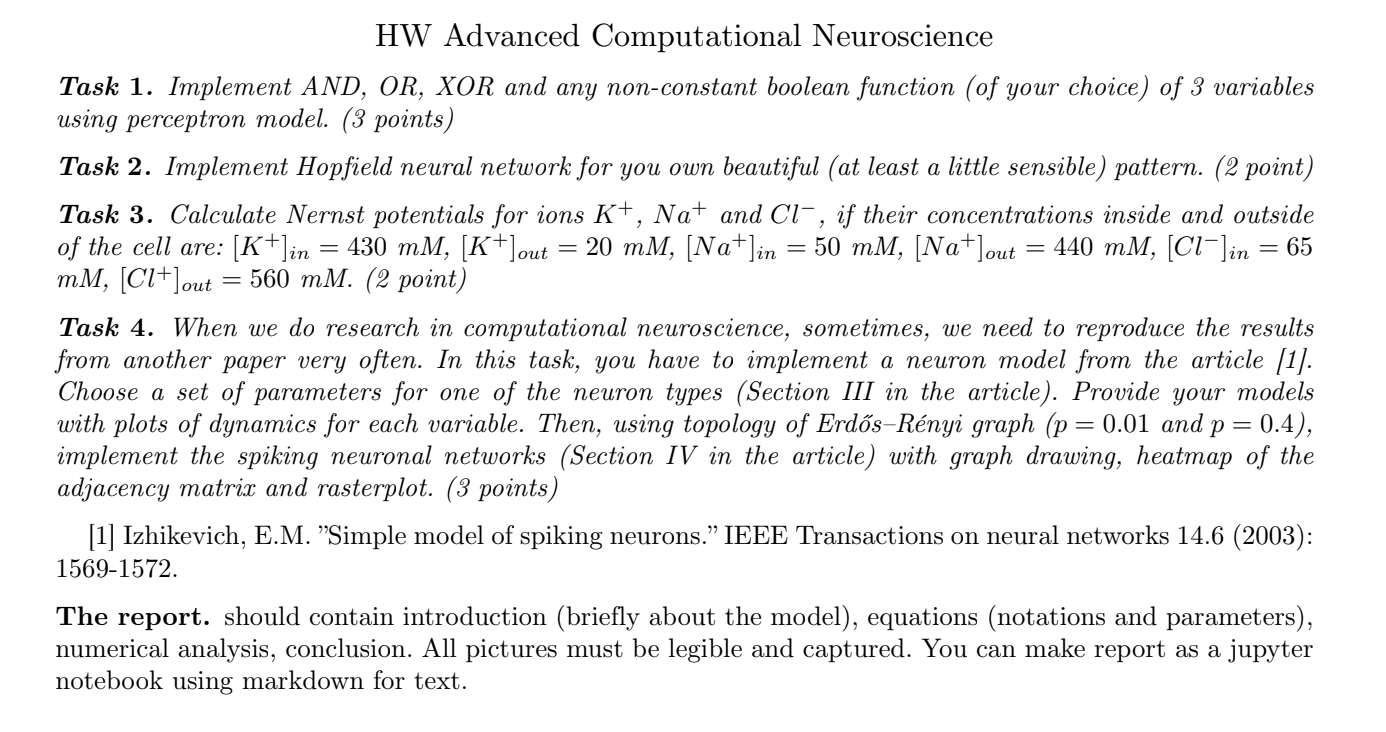

### Task 1. Implement AND, OR, XOR and any non-constant boolean function (of your choice) of 3 variables using perceptron model. (3 points)

A perceptron is a type of artificial neural network that can be used for binary classification. It consists of a single layer of artificial neurons, also known as perceptrons, which are connected to the input data through weighted edges. The perceptron receives input signals from the input data, multiplies them by their corresponding weights, and sums them up. The resulting value is passed through an activation function, which determines whether the perceptron fires or not. If the activation function output is above a certain threshold, the perceptron fires and produces an output of 1, otherwise it produces an output of 0.

The weights of the edges are adjusted during training by using an optimization algorithm, such as stochastic gradient descent, to minimize the difference between the predicted output and the true output. This process is repeated until the error between the predicted output and the true output is minimized.

The perceptron model can be expressed mathematically as follows:

$$y = f(w₁x₁ + w₂x₂ + ... + wₙxₙ + b)$$

where:

*y* is the predicted output (0 or 1),

*f* is the activation function, which is typically a step function that outputs 0 if the input is less than some threshold, and 1 if the input is greater than or equal to the threshold,

*x₁, x₂, ..., xₙ* are the input features,

*w₁, w₂, ..., wₙ* are the weights associated with each input feature
*b* is the bias term, which is a constant value added to the sum of the weighted inputs. 


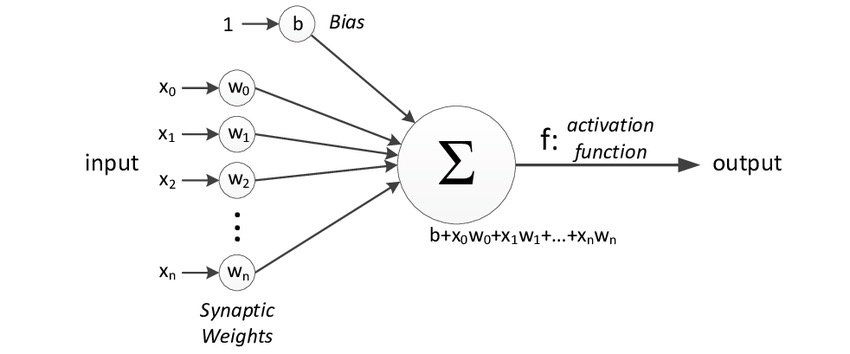

Picture: Percetron model

In [ ]:
#define a simple perceptron class that can learn to perform a boolean function

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = [0.0] * (num_inputs + 1)
        self.learning_rate = 0.1

    def predict(self, inputs):
        weighted_sum = sum(self.weights[i] * inputs[i] for i in range(len(inputs))) + self.weights[-1]
        return 1.0 if weighted_sum > 0 else 0.0

    def train(self, inputs, expected_output):
        prediction = self.predict(inputs)
        error = expected_output - prediction
        self.weights[-1] += self.learning_rate * error
        for i in range(len(inputs)):
            self.weights[i] += self.learning_rate * error * inputs[i]

In [ ]:
class MLP:
    def __init__(self, num_inputs, num_hidden, num_outputs, learning_rate=0.1):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        self.learning_rate = learning_rate

        # Initialize the weights and biases for the hidden and output layers
        self.hidden_weights = np.random.rand(num_inputs, num_hidden)
        self.hidden_bias = np.random.rand(num_hidden)
        self.output_weights = np.random.rand(num_hidden, num_outputs)
        self.output_bias = np.random.rand(num_outputs)

    def predict(self, inputs):
        # Calculate the output of the hidden layer
        hidden_output = np.dot(inputs, self.hidden_weights) + self.hidden_bias

        # Apply the sigmoid activation function to the hidden output
        hidden_output = 1 / (1 + np.exp(-hidden_output))

        # Calculate the output of the output layer
        output = np.dot(hidden_output, self.output_weights) + self.output_bias

        # Apply the sigmoid activation function to the output
        output = 1 / (1 + np.exp(-output))

        return output

    def train(self, inputs, expected_output):

        hidden_output = np.dot(inputs, self.hidden_weights) + self.hidden_bias

        # Make a prediction pass to calculate the output
        output = self.predict(inputs)

        # Calculate the error at the output
        output_error = expected_output - output

        # Calculate the error at the hidden layer
        hidden_error = output_error.dot(self.output_weights.T)

        # Update the weights and biases
        self.output_weights += self.learning_rate * hidden_output.T.dot(output_error)
        self.output_bias += self.learning_rate * output_error
        self.hidden_weights += self.learning_rate * inputs.T.dot(hidden_error)
        self.hidden_bias += self.learning_rate * hidden_error

In [ ]:
and_result = [
    ([0,0],0),
    ([0,1],0),
    ([1,0],0),
    ([1,1],1)
]

or_result = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1)
]

xor_result = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],0)
]


In [4]:
and_perc = Perceptron(2)
or_perc = Perceptron(2)
xor_perc = Perceptron(2)


for i in range(100000):

  and_perc.train([0,0],0)
  and_perc.train([0,1],0)
  and_perc.train([1,0],0)
  and_perc.train([1,1],1)

  or_perc.train([0,0],0)
  or_perc.train([0,1],1)
  or_perc.train([1,0],1)
  or_perc.train([1,1],1)

  xor_perc.train([0,0],0)
  xor_perc.train([0,1],1)
  xor_perc.train([1,0],1)
  xor_perc.train([1,1],0)


In [5]:
and_check = 0
or_check = 0
xor_check = 0

for i in and_result:
  if and_perc.predict(i[0])==i[1]:
    and_check += 1
  else:
    print(f'(AND) Test failed on data: {i[0]}')

for i in or_result:
  if or_perc.predict(i[0])==i[1]:
    or_check += 1
  else:
    print(f'(OR) Test failed on data: {i[0]}')

for i in xor_result:
  if xor_perc.predict(i[0])==i[1]:
    xor_check += 1
  else:
    print(f'(XOR) Test failed on data: {i[0]} predicted {xor_perc.predict(i[0])}')

if and_check == 4:
  print('(AND) works')

if or_check == 4:
  print('(OR) works')

if xor_check == 4:
  print('(XOR) works')

  

(XOR) Test failed on data: [0, 0] predicted 1.0
(XOR) Test failed on data: [1, 0] predicted 0.0
(AND) works
(OR) works


In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
#Fill in the truth table for our function F = x + !y*z

def generate_truth_table(inputs):
  # Create an empty list to store the output values
  outputs = []

  # Iterate over the input combinations
  for x, y, z in inputs:
    # Calculate the output for each input combination
    F = x or (not y and z)

    # Append the output to the list
    outputs.append(F)

  # Return the truth table as a list of tuples
  return outputs

# Define the input combinations
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

# Generate the truth table
truth_table = generate_truth_table(inputs)

# Print the truth table
print(truth_table)

[0, 1, False, False, 1, 1, 1, 1]


In [8]:
# since the regular perceptron has problems with XOR, we use the multilayer perceptron from the scikit-learn library

In [9]:
clf = MLPClassifier(activation='relu', 
                    alpha=1e-5,
                    hidden_layer_sizes=(4,4), 
                    random_state=32,max_iter=100000)
 
clf_F = MLPClassifier(activation='relu', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,4), 
                    random_state=32, max_iter=100000)
X = [i[0] for i in xor_result]
y = [i[1] for i in xor_result]

clf.fit(X,y)
clf_F.fit(inputs, truth_table)    


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 4), max_iter=100000,
              random_state=32)

In [10]:
xor_check = 0
f_check = 0

for i in range(len(truth_table)):
  if clf_F.predict([inputs[i]]).tolist()[0]==truth_table[i]:
    f_check += 1
  else:
    print(f'(F = x+ !y*z) Test failed on data: {inputs[i]}')

for i in xor_result:
  if clf.predict([i[0]]).tolist()[0]==i[1]:
    xor_check += 1
  else:
    print(f'(XOR) Test failed on data: {i[0]} predicted {xor_perc.predict(i[0])}')

if f_check == 8:
  print('(F) works')

if xor_check == 4:
  print('(XOR) works')

(F) works
(XOR) works


2nd solution

In [11]:
import numpy as np

def unit_step(v):
	""" Heavyside Step function. v must be a scalar """
	if v >= 0:
		return 1
	else:
		return 0
	
def perceptron(x, w, b):
	v = np.dot(w, x) + b
	y = unit_step(v)
	return y

def NOT_percep(x):
	return perceptron(x, w=-1, b=0.5)

print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

NOT(0) = 1
NOT(1) = 0


In [12]:
def OR_percep(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("OR({}, {}) = {}".format(1, 1, OR_percep(example1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(example2)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(example3)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(example4)))

OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0


In [13]:
def AND_percep(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

# Test
example1 = np.array([1, 1])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([0, 0])

print("AND({}, {}) = {}".format(1, 1, AND_percep(example1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(example2)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(example3)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(example4)))

AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0


In [14]:
def XOR_net(x):
    gate_1 = AND_percep(x)
    gate_2 = NOT_percep(gate_1)
    gate_3 = OR_percep(x)
    new_x = np.array([gate_2, gate_3])
    output = AND_percep(new_x)
    return output

print("XOR({}, {}) = {}".format(1, 1, XOR_net(example1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(example2)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(example3)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(example4)))

XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0


**Conclusion**. We took one layer percepron, and we implemented AND and OR functions on it. For XOR function and our boolean function we used MLP. We observe that a trained perceptron can behave as a logical function. 

### Task 2. Implement Hopfield neural network for you own beautiful (at least a little sensible) pattern. (2 points)

Hopfield neural network is a type of recurrent artificial neural network that can be used for storing and recalling patterns. Originally developed by John Hopfield in 1982, it is based on the idea of associative memory, which is the ability of a system to recall a previously stored pattern of activity when given a partial or degraded version of that pattern.

Hopfield networks are composed of a single layer of interconnected neurons, each of which receives input from all other neurons and sends output to all other neurons. The neurons are fully connected, meaning that every neuron is connected to every other neuron in the network. The strength of the connection between two neurons is represented by a weight, which can be positive or negative.

The activity of a Hopfield network is determined by the patterns of activity of its neurons and the strengths of the connections between them. When a pattern is presented to the network, the neurons will adjust their activity according to the strengths of the connections between them, with the goal of converging on a stable state in which the activity of the neurons represents the stored pattern.

The update rule for a Hopfield network is given by the following formula:

$$y(i) = sign(∑j w(i,j)x(j) - θ)$$

where: 

*y(i)* is the output of the ith neuron, 

*x(j)* is the input to the jth neuron, 

*w(i,j)* is the weight of the connection between the ith and jth neurons, and θ is the threshold of the ith neuron. 

The function *"sign"* returns 1 if the argument is positive and -1 if the argument is negative.

In [15]:
#define a HopfieldNetwork class that represents a Hopfield neural network

import numpy as np

class HopfieldNetwork:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.num_neurons = width * height
        self.weights = np.zeros((self.num_neurons, self.num_neurons))

    def store_pattern(self, pattern):
        """Store a pattern in the Hopfield network"""
        # Flatten the pattern into a 1D array
        pattern = np.array(pattern).flatten()
        for i in range(self.num_neurons):
            for j in range(self.num_neurons):
                if i != (i-j):
                    self.weights[i][i-j] = pattern[i] * pattern[i-j]

    def recall(self, pattern, max_iterations=100):
        """Recall a stored pattern from the given pattern"""
        # Flatten the pattern into a 1D array
        pattern = np.array(pattern).flatten()
        for _ in range(max_iterations):
            for i in range(self.num_neurons):
                activation = np.dot(self.weights[i], pattern)
                pattern[i] = 1 if activation > 0 else -1
        # Reshape the output pattern into a 2D array
        return pattern.reshape((self.height, self.width))



In [16]:
def imageGenerator(imageVector):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] == [1, 1, 1, 1]):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(imageVector),len(imageVector)])

    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1


    return cleanImage,noisyImage

In [17]:
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

In [18]:
images = img.imread('kek2.png','w').copy()
vector,noisyVec = imageGenerator(images.tolist())

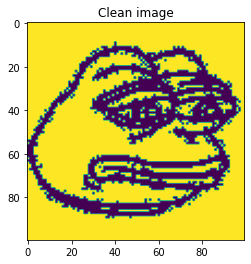

In [19]:
plt.title('Clean image')
plt.imshow(vector.tolist())

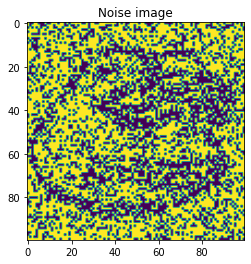

In [20]:
plt.title('Noise image')
plt.imshow(noisyVec.tolist())

In [21]:
# Create a Hopfield network
hopfield_network = HopfieldNetwork(100,100)

# Store a pattern in the network
pattern = vector.tolist()
hopfield_network.store_pattern(pattern)



In [22]:
# Recall the stored pattern from a slightly corrupted version of the pattern
corrupted_pattern = noisyVec.tolist()
recovered_pattern = hopfield_network.recall(corrupted_pattern)

print(recovered_pattern)  # prints [1, -1, 1, -1]

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


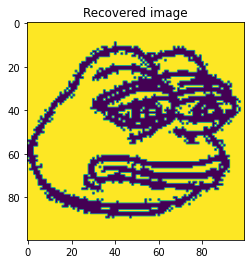

In [23]:
plt.title('Recovered image')
plt.imshow(recovered_pattern)

**Conclusion**. Here we demonstrate that a Hopfield network is a suitable model for storing and recalling images. Images are stored by calculating a corresponding weight matrix. Hopfield net recalls the images which are stored in it and gives the corresponding original image which will be the closest matching pattern for the given incomplete or corrupted image. 

### Task 3. Calculate Nernst potentials for ions K+, N a+ and Cl−, if their concentrations inside and outside of the cell are: [K+]in = 430 mM, [K+]out = 20 mM, [N a+]in = 50 mM, [N a+]out = 440 mM, [Cl−]in = 65 mM, [Cl+]out = 560 mM. (2 point)

The Nernst potential for a particular ion is a measure of the electrochemical potential of that ion across a membrane. It can be calculated using the Nernst equation, which is given by:

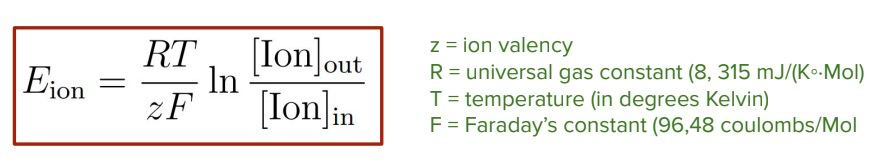

In [24]:
import math

R = 8.314  # gas constant in J/mol*K
T = 310  # temperature in K
F = 96485.33289  # Faraday constant in C/mol

# Calculate Nernst potential for K+
E_K = (R*T/1) * math.log(20e-3 / 430e-3) / F
print(f'E_K = {E_K:.5f} mV')

# Calculate Nernst potential for Na+
E_Na = (R*T/1) * math.log(440e-3 / 50e-3) / F
print(f'E_Na = {E_Na:.5f} mV')

# Calculate Nernst potential for Cl−
E_Cl = (R*T/-1) * math.log(560e-3 / 65e-3) / F
print(f'E_Cl = {E_Cl:.5f} mV')


E_K = -0.08195 mV
E_Na = 0.05809 mV
E_Cl = -0.05753 mV


### Task 4. When we do research in computational neuroscience, sometimes, we need to reproduce the results from another paper very often. In this task, you have to implement a neuron model from the article [1]. Choose a set of parameters for one of the neuron types (Section III in the article). Provide your models with plots of dynamics for each variable. Then, using topology of Erdős–Rényi graph (p = 0.01 and p = 0.4), implement the spiking neuronal networks (Section IV in the article) with graph drawing, heatmap of the adjacency matrix and rasterplot. (3 points) 

[1] Izhikevich, E.M. ”Simple model of spiking neurons.” IEEE Transactions on neural networks 14.6 (2003): 1569-1572.

In the article ”Simple model of spiking neurons”, Eugene Izhikevich proposed a simple mathematical model for simulating the behavior of spiking neurons, which are neurons that produce discrete pulses of electrical activity called action potentials or spikes. The model is based on the idea that the dynamics of a spiking neuron can be described by a set of differential equations that govern the changes in the membrane potential of the neuron over time.

The model consists of two differential equations:

$$dv/dt = 0.04v^2 + 5v + 140 - u + I$$
$$du/dt = a(bv - u)$$

where v is the membrane potential of the neuron, u is a recovery variable, I is the input current to the neuron, and a and b are constants that govern the time constants of the neuron.

The first equation describes the change in the membrane potential of the neuron over time. The membrane potential is influenced by three factors: the voltage-dependent ion channels that allow ions to flow into or out of the neuron, the leak channels that allow ions to leak out of the neuron, and the input current to the neuron. The second equation describes the recovery of the neuron after it has fired an action potential.

The model also includes a threshold condition that determines when the neuron will fire an action potential. When the membrane potential of the neuron reaches a certain threshold, the neuron will fire an action potential and the membrane potential will reset to a certain value. This threshold condition is given by the following formula:

if v ≥ v_threshold then v = c, u = u + d

where v_threshold is the threshold membrane potential, c is the reset value of the membrane potential, and d is a constant that determines the amount by which the recovery variable u is incremented after the neuron fires an action potential.

In [25]:
pip install scipy==1.8.0

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
I = 5  # External current
a = 0.02  # Time scale of recovery variable
b = 0.2  # Sensitivity of recovery variable
c = -65  # Reset value of membrane potential after spike
d = 6  # Reset of recovery variable after spike

curr_start = 250
curr_end = 500

In [28]:
def izhikevich_neuron(I, a, b, c, d, _t=100, v0=0, u0=0):
    """Simulate an Izhikevich neuron with the given parameters"""
    v = v0
    u = u0
    t = 0
    curr = np.full(_t, I)
    curr[curr_start:curr_end] = 0
    while t < _t:
        v_prev = v
        v = v + 0.5 * (0.04 * v**2 + 5*v + 140 - u + curr[t-1])
        u = u + a * (b * v_prev - u)
        if v > 30:
            v = c
            u = u + d
        t += 1
        yield t, v, u, curr


In [29]:
def plot_izhikevich_neuron(I, a, b, c, d, _t):
    """Plot the dynamics of an Izhikevich neuron with the given parameters"""
    t, v, u, curr = zip(*list(izhikevich_neuron(I, a, b, c, d, _t)))
    fig, axs = plt.subplots(3, sharex=True, figsize=(7,8))
    fig.suptitle("Izhikevich")
    
    axs[0].plot(t,v)
    axs[0].set_title('v (mV)')
    axs[0].grid()

    axs[1].plot(t,u)
    axs[1].set_title('u')
    axs[1].grid()
    
    axs[2].plot(t,curr[0])
    axs[2].set_title('I (mA)')
    axs[2].grid()
    
    plt.xlabel('Time (ms)')
    

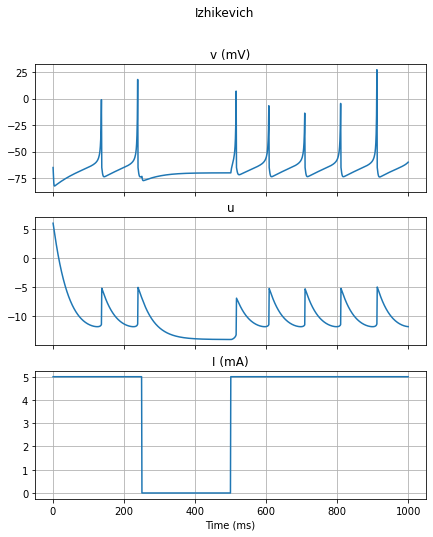

In [30]:
plot_izhikevich_neuron(I, a, b, c, d, 1000)

### Code from article but in python

In [31]:
#IV Section from matlab to python

In [32]:
import numpy as np

# Set the number of excitatory and inhibitory neurons
Ne = 800
Ni = 200

# Generate random values for the parameters
re = np.random.rand(Ne, 1)
ri = np.random.rand(Ni, 1)
a = np.vstack([0.02 * np.ones((Ne, 1)), 0.02 + 0.08 * ri])
a_1 = np.vstack([np.full_like(re, 0.02), 0.02 + 0.08 * ri])
b = np.vstack([0.2 * np.ones((Ne, 1)), 0.25 - 0.05 * ri])
c = np.vstack([-65 + 15 * re**2, -65 * np.ones((Ni, 1))])
d = np.vstack([8 - 6 * re**2, 2 * np.ones((Ni, 1))])
S = np.hstack([0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)])



In [33]:
# Initialize the state variables
v = -65 * np.ones((Ne + Ni, 1))
u = b * v
firings = []

In [34]:
# Simulate for 1000 time steps
for t in range(900):
    # Generate random thalamic input
    I = np.vstack([5 * np.random.randn(Ne, 1), 2 * np.random.randn(Ni, 1)])
    
    # Find the indices of neurons that have fired
    fired = np.where(v >= 30)[0]
    
    if np.size(fired)!=0:
        firings.append([[t]*len(fired),fired])

    print(fired)
    # Record the spike times
    #firings.append(np.column_stack((t + 0 * fired, fired)))

    # Update the state variables
    v[fired] = c[fired]
    u[fired] = u[fired] + d[fired]
    I = I + S[:, fired].sum(axis=1)[:,None]
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)  # Step 0.5 ms
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)  
    u = u + a * (b * v - u)

[]
[]
[]
[]
[357 692]
[  6 390 775]
[117 185 419 756]
[ 55 383 446 621]
[128 516 672 707 774]
[135 141 241 310 541]
[ 24  28 117 250 413 441 442 570 690 802 982]
[ 54 160 414 575 780 838 998]
[  3 180 269 286 315 352 364 457 477 624 659 696 879 908 910 911 961]
[ 20 151 276 440 470 476 488 638 697 855 917 945 985]
[ 83 163 168 341 348 505 584 711 757 758 770 844 893 900 959]
[ 10  68 187 323 362 547 616 790 815 964]
[ 42  84 295 472 475 519 560 577 597 682 709 713 824 874 916]
[ 75 205 253 263 283 492 639 677 712 817 848]
[ 22  70 177 317 401 488 515 903 927 968 970 993]
[ 63 108 111 261 382 546 762 770 808 818]
[122 221 293 309 479 593 703 868 972 991]
[ 39 158 190 265 351 368 428 484 556 734 782 820 833 962 997]
[  0  90 194 229 230 252 291 322 382 569]
[  4 109 165 201 207 350 418 686 781]
[138 158 206 411 423 517 622 710 851 974]
[ 31  60 196 215 219 387 397 422 460 498 508 573 748 795 845 988]
[149 318 328 333 340 365 421 459 506 558 660 683 742 811 832 861 898]
[ 15  16  26  37  

<ipython-input-35-9e2c0a97b708>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ff = np.array(firings)


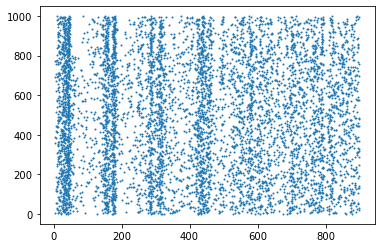

In [35]:
ff = np.array(firings)

x = [y for x in ff[:, 0] for y in x]
y = [y for x in ff[:, 1] for y in x]

plt.scatter(x, y, s=1)

plt.show()

### Code to net of neurons

In [36]:
# Act I (Graph)

import networkx as nx

# Set the probability of creating an edge between two nodes
p1 = 0.01
p2 = 0.4

n = 1000

# Create the Erdős–Rényi graphs with the given probabilities
G1 = nx.erdos_renyi_graph(n, p1)
G2 = nx.erdos_renyi_graph(n, p2)

# Get the adjacency matrices of the graphs
A1 = nx.adjacency_matrix(G1)
A2 = nx.adjacency_matrix(G2)

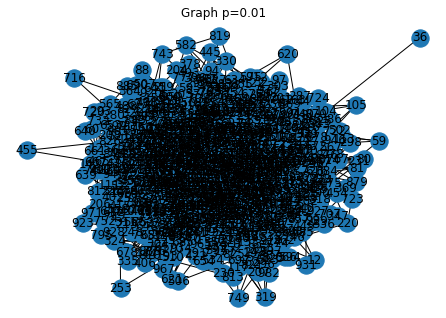

In [37]:
# Plot the graph
plt.figure()
nx.draw(G1, with_labels=True)
plt.title('Graph p=0.01')
plt.show()

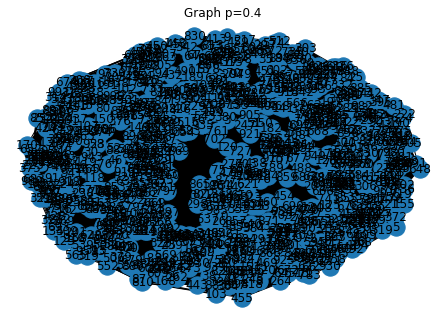

In [38]:
# Plot the graph
plt.figure()
nx.draw(G2, with_labels=True)
plt.title('Graph p=0.4')
plt.show()

In [39]:
import seaborn as sns

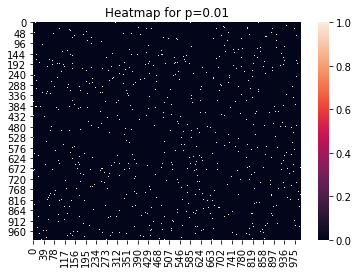

In [40]:
# Plot the heatmap
sns.heatmap(A1.todense())
plt.title('Heatmap for p=0.01')
plt.show()

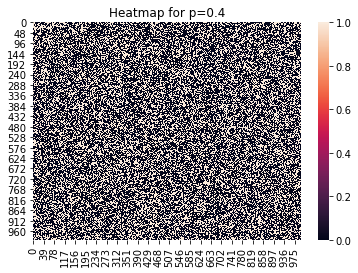

In [41]:
# Plot the heatmap
sns.heatmap(A2.todense())
plt.title('Heatmap for p=0.4')
plt.show()

In [42]:
class IzhikevichNeuron:
    def __init__(self, I, a, b, c, d, _t=800, v0=0, u0=0, weights=None):
        self.I = I
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self._t = _t
        self.v = v0
        self.u = u0
        self.weights = weights
    
    def simulate(self, neurons, inputs, weights):
        t = 0
        while t < self._t:
            c = []
            for neuron_number, neuron in enumerate(neurons):
                v_prev = neuron.v
                neuron.v = neuron.v + 0.5 * (0.04 * neuron.v**2 + 5*neuron.v + 140 - neuron.u + neuron.I)
                neuron.u = neuron.u + neuron.a * (neuron.b * v_prev - neuron.u)
                if neuron.v > 30:
                    neuron.v = neuron.c
                    neuron.u = neuron.u + neuron.d
                    if t: c.append(1)
                    else: c.append(0)
                else:
                    c.append(0)
            for neuron_number, neuron in enumerate(neurons):
                neuron.update_inputs(inputs[neuron_number], c ,weights[neuron_number])
            t += 1
            yield t, [neuron.v for neuron in neurons], [neuron.u for neuron in neurons], c


    
    def update_inputs(self, inputs, values, weights):
      inputs = np.array(inputs)
      values = np.array(values)
      weights = np.array(weights)
      val = np.sum(values * inputs * weights) / len(inputs)
      self.I = self.I + self.I * val

In [43]:
import random
from operator import itemgetter

In [44]:
# Create a list of neurons
neurons = [IzhikevichNeuron(I=5, a=0.02, b=0.2, c=-65, d=8) for _ in range(n)]

# Set the weights of the neurons
weights = [[random.random() for _ in range(n)] for _ in range(n)]

# Simulate the neurons
firings1 = []
final_v1 = []

for t, v, u, c in neurons[0].simulate(neurons, A1.todense().tolist(), weights):
    firings1.extend(zip([t] * sum(c), [i for i, x in enumerate(c) if x]))
    final_v1.append(v)

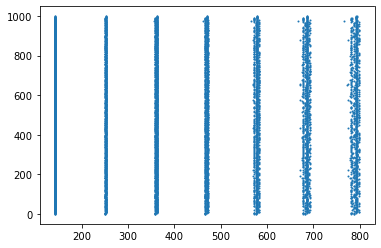

In [45]:
x1, y1 = zip(*firings1)
plt.scatter(x1, y1, s=1)

In [47]:
final_v1_t = list(zip(*final_v1))

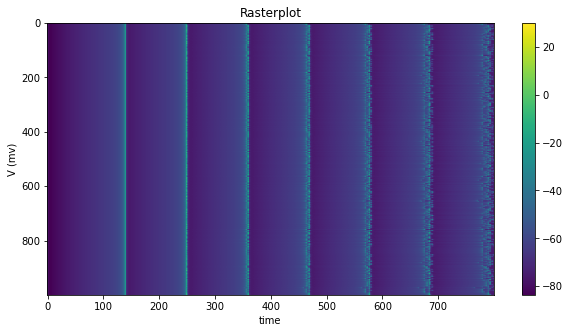

In [48]:
plt.figure(figsize=(10, 5))
plt.imshow(final_v1_t, aspect='auto')          
plt.ylabel('V (mv)')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

In [49]:
# Create a list of neurons p = 0.4
neurons = [IzhikevichNeuron(I=4, a=0.02, b=0.2, c=-65, d=8) for _ in range(n)]

# Set the weights of the neurons
weights = [[random.random() for _ in range(n)] for _ in range(n)]

# Simulate the neurons
firings2 = []

final_v2 = []

for t, v, u, c in neurons[0].simulate(neurons, A2.todense().tolist(), weights):
    firings2.extend(zip([t] * sum(c), [i for i, x in enumerate(c) if x]))
    final_v2.append(v)


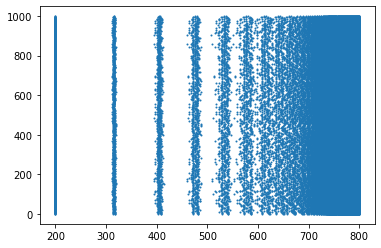

In [50]:
x2, y2 = zip(*firings2)
plt.scatter(x2, y2, s=1)

In [51]:
final_v2_t = list(zip(*final_v2))

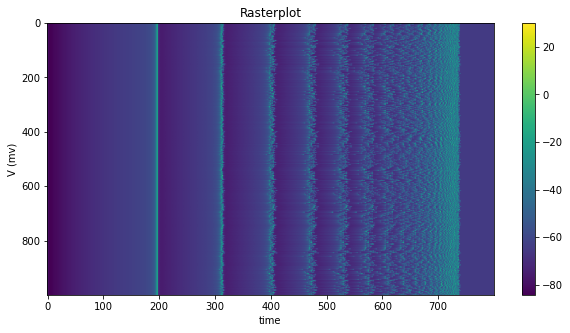

In [52]:
plt.figure(figsize=(10, 5))
plt.imshow(final_v2_t, aspect='auto')          
plt.ylabel('V (mv)')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

**Conclusion**. With greater p more neurons are connected to each other and therefore spikes occur side by side, with less p there are fewer connections between neurons and they are more evenly distributed. It seems like Izhikevich model has a logical mistake, not multiplying the sum of the weights by their current. But it is good for describing empirical data, though.